In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
# load the dataset
file_path = 'Jumlah Penduduk.xlsx'  
data = pd.ExcelFile(file_path)
df = data.parse('Sheet1')

In [5]:
# clean the dataset, drop irrelevant rows and rename columns
df_cleaned = df.dropna(subset=['Provinsi']).reset_index(drop=True)
df_cleaned.columns = [
    'Provinsi', 
    'Laki_2020', 'Laki_2019', 'Laki_2018', 
    'Perempuan_2020', 'Perempuan_2019', 'Perempuan_2018', 
    'Jumlah_2020', 'Jumlah_2019', 'Jumlah_2018'
]
df_cleaned = df_cleaned.iloc[1:].reset_index(drop=True)

In [7]:
# convert numeric columns to proper numeric values
for col in df_cleaned.columns[1:]:
    df_cleaned[col] = df_cleaned[col].str.replace('\u2009', '').str.replace(',', '.').astype(float)

# filter for Jawa Timur and DKI Jakarta
filtered_data = df_cleaned[df_cleaned['Provinsi'].isin(['JAWA TIMUR', 'DKI JAKARTA'])]

In [9]:
# select relevant attributes
selected_columns = ['Laki_2020', 'Perempuan_2020', 'Jumlah_2020']
data_for_clustering = filtered_data[selected_columns]

In [11]:
# normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_for_clustering)

In [13]:
# perform clustering for k = 2 to min(7, len(data_normalized))
max_clusters = min(7, len(data_normalized))
cluster_results = {}
for k in range(2, max_clusters + 1):  # Start with 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_normalized)
    filtered_data[f'Cluster_{k}'] = clusters
    cluster_results[k] = clusters

E:\KULIAH UDINUS\SEMESTER 5\Komputasi Quantum\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\AppData\Local\Temp\ipykernel_1500\1807668818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[f'Cluster_{k}'] = clusters


E:\KULIAH UDINUS\SEMESTER 5\Komputasi Quantum\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


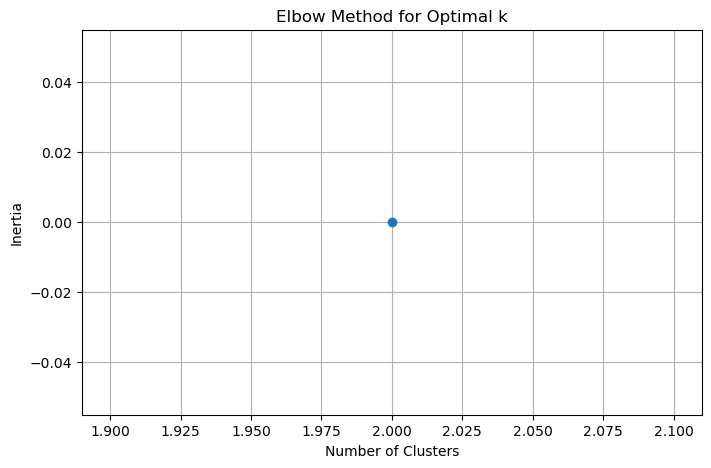

In [15]:
# plotting elbow method for visualizing optimal k
inertia = []
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

if inertia:
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), inertia, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid()
    plt.show()


E:\KULIAH UDINUS\SEMESTER 5\Komputasi Quantum\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


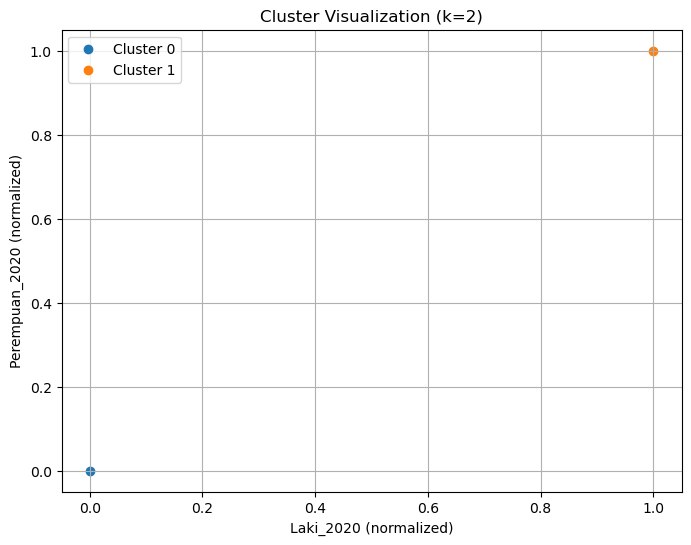

In [17]:
# plot clusters for k=2 as an example
if len(data_normalized) >= 2:
    kmeans = KMeans(n_clusters=2, random_state=42)
    clusters = kmeans.fit_predict(data_normalized)

    plt.figure(figsize=(8, 6))
    for cluster in range(2):
        plt.scatter(
            data_normalized[clusters == cluster, 0],  # X-axis: Laki_2020
            data_normalized[clusters == cluster, 1],  # Y-axis: Perempuan_2020
            label=f'Cluster {cluster}'
        )

    plt.title('Cluster Visualization (k=2)')
    plt.xlabel('Laki_2020 (normalized)')
    plt.ylabel('Perempuan_2020 (normalized)')
    plt.legend()
    plt.grid()
    plt.show()

In [19]:
# plot clusters for k=4 to 7 (if possible)
for k in range(4, 8):
    if len(data_normalized) >= k:
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(data_normalized)

        plt.figure(figsize=(8, 6))
        for cluster in range(k):
            plt.scatter(
                data_normalized[clusters == cluster, 0],  # X-axis: Laki_2020
                data_normalized[clusters == cluster, 1],  # Y-axis: Perempuan_2020
                label=f'Cluster {cluster}'
            )

        plt.title(f'Cluster Visualization (k={k})')
        plt.xlabel('Laki_2020 (normalized)')
        plt.ylabel('Perempuan_2020 (normalized)')
        plt.legend()
        plt.grid()
        plt.show()